# <center>Tutorial - Quantum Key Distribution</center>

# 1. Introduction

<b>"Key distribution"</b> is a type of secure communication protocol which is accomplished with the use of a <b>"key"</b> (which is just a bitstring with a sequence of 0s and 1s) that is uniquely known only by the sender (let's call them "Alice") and receiver (let's call them "Bob"), and enables them to encrypt and decrypt a sent message. If a key can be securely distributed between Alice and Bob, the encrypted message can be securely sent over a public channel. Without this key, it is difficult to sucessfully decrypt this message by an eavesdropper. Thus, a secure communication relies on the ability of Alice to encrypt the message in a way that only Bob can decrypt it. 

<b>"Quantum key distribution"</b> or <b>"QKD"</b> is unique compared to classical key distribution schemes because it makes use of an important aspect of quantum mechanics where any measurement performed on a quantum system (by any third party, in this case an eavesdropper) disturbs it, thus detecting eavesdropping attempts and securing the message.

In this tutorial, we will be using <b>Qiskit</b> code to implement <b>BB84 protocol</b> which is a very popular quantum key distribution scheme.

You can read more about BB84 and QKD from their [chapter in the Qiskit Textbook](https://qiskit.org/textbook/ch-algorithms/quantum-key-distribution.html) [1].
><b>Note</b> - Instead of directly defining circuits, we will create functions that define the circuits.


## 1.1 QKD Layout 

We will be implementing the BB84 protocol by following these steps:
<br>
>1.<b> SELECT ENCODING</b>: Alice randomly selects a basis ( × or + ) to encode each bit.<br>
    2.<b> SELECT MEASUREMENT</b>: Bob randomly selects a basis ( × or + ) to measure each bit.<br>
    3.<b> ENCODING</b>: Alice creates the quantum states encoded in the selected bases.<br>
    4.<b> SENDING</b>: Alice sends Bob the encoded states via the quantum channel.<br>
    5.<b> MEASUREMENT</b>: Bob measures the quantum states in his pre-selected measurement bases.<br>
    6.<b> SEND BASES</b>: Alice send which basis were used to encode each bit via the classical channel.<br>
    7.<b> FIND SYMMETRIC KEY</b>: Alice and Bob discard bits in their key that used a different encoding and decoding basis.<br>
 
These steps allow a secure key distribution between Alice and Bob, where the two will be able to send secure and encrypted messages to each other.

## 1.2 Imports and Installation

If you have never installed Qiskit before, run the cells below to install Qiskit 0.20.0 in your local Jupyter Notebook environment. You may ignore this cell if you already have Qiskit installed and set up.

In [ ]:
# Run this cell to install the specific qiskit version 

!pip install qiskit==0.20.0
#import warnings
#warnings.filterwarnings('ignore')
from IPython.display import clear_output
clear_output()

Run the cell below to import Qiskit and its dependencies required to work on this tutorial.

In [ ]:
import qiskit
from random import getrandbits
from qiskit import QuantumCircuit, Aer, execute

## 1.3 Protocol Requirements

In this tutorial, we will use a key length of 100.

In a real implemenetation of BB84, physical photons are sent through an optical fibre to Bob in step 4 of the QKD layout. Instead, we will be using <b>Quantum_Channel</b> as our optical fibre, which is simply a python list here.

Similarly, a classical channel is required, which is a wire that sends electrical signals. <b>Classical_Channel</b> is another list which we will be using here as a replacement.

In [ ]:
Key_length = 100
Quantum_Channel = []
Classical_Channel = []

# 2. Following the QKD steps

>We will now implement the steps mentioned above.

## 2.1 Step 1: Select Encoding

Alice randomly selects a bit key and a basis to encode each bit with the key.

The function given takes an argument as the number of bases that Alice needs to randomly select, and returns a bitstring of each selected encoding represented by either 0 or 1.

In [ ]:
def select_encoding(length):
    # Stores the states Alice will encode
    alice_bitstring = ""
    
    # Stores the bases that Alice will prepare the states in for encoding
    alice_bases = ""
    
    for i in range(length):
        # getrandbits is used to get either a 0 or 1 randomly
        # The "1" in the function argument is the number of bits to be generated
        alice_bitstring += (str(getrandbits(1)))
        
        # 0 means encode in the (0,1) basis and 1 means encode in the (+,-) basis
        alice_bases += (str(getrandbits(1)))
    
    
    return alice_bitstring, alice_bases # returns the string of bits and the bitstrings of bases they should be encoded in

Next we create the functions **alice_bitstring** and **alic_bases**. We can look at the first 20 elements of each, which should be in 0s and 1s.

In [ ]:
alice_bitstring, alice_bases = select_encoding(Key_length)

# First 20 elements:
print("alice_bitstring: ", alice_bitstring[:20])
print("alice_bases: ", alice_bases[:20])

## 2.2 Step 2: Select Measurement

Bob randomly selects a basis for measuring each bit. The below given function takes an argument as the number of bases that Bob needs to randomly select, and returns a bitstring of each chosen measurement basis represented by either 0 or 1.

This time, you will be writing your code to generate the meaurement basis for Bob which should be similar to the step for Alice.

In [ ]:
def select_measurement_basis(length):
    # Similar to before,store the bases that Bob will measure 
    bob_bases = ""
    for i in range(length):
        # Again we use getrandbits to generate a 0 or 1 randomly
        # Insert your code here
        
        
        
    return bob_bases           # returns the bitstring of random bases to measure in

In [ ]:
bob_bases = select_measurement_basis(Key_length)

# First 20 elements:
print("selected_measurements: ", bob_bases[:20])

## 2.3 Step 3: Encoding

After this, we will use functions **alice_bitstring** and **alice_bases** to generate the quantum states for Alice. We will use <b>QuantumCircuit</b> object to define our circuit and write the code to encode our bits, as demonstrated in the following [example for this experiment](https://github.com/qiskit-community/may4_challenge_exercises/blob/master/ex03/Challenge3_BB84.ipynb) [2]:
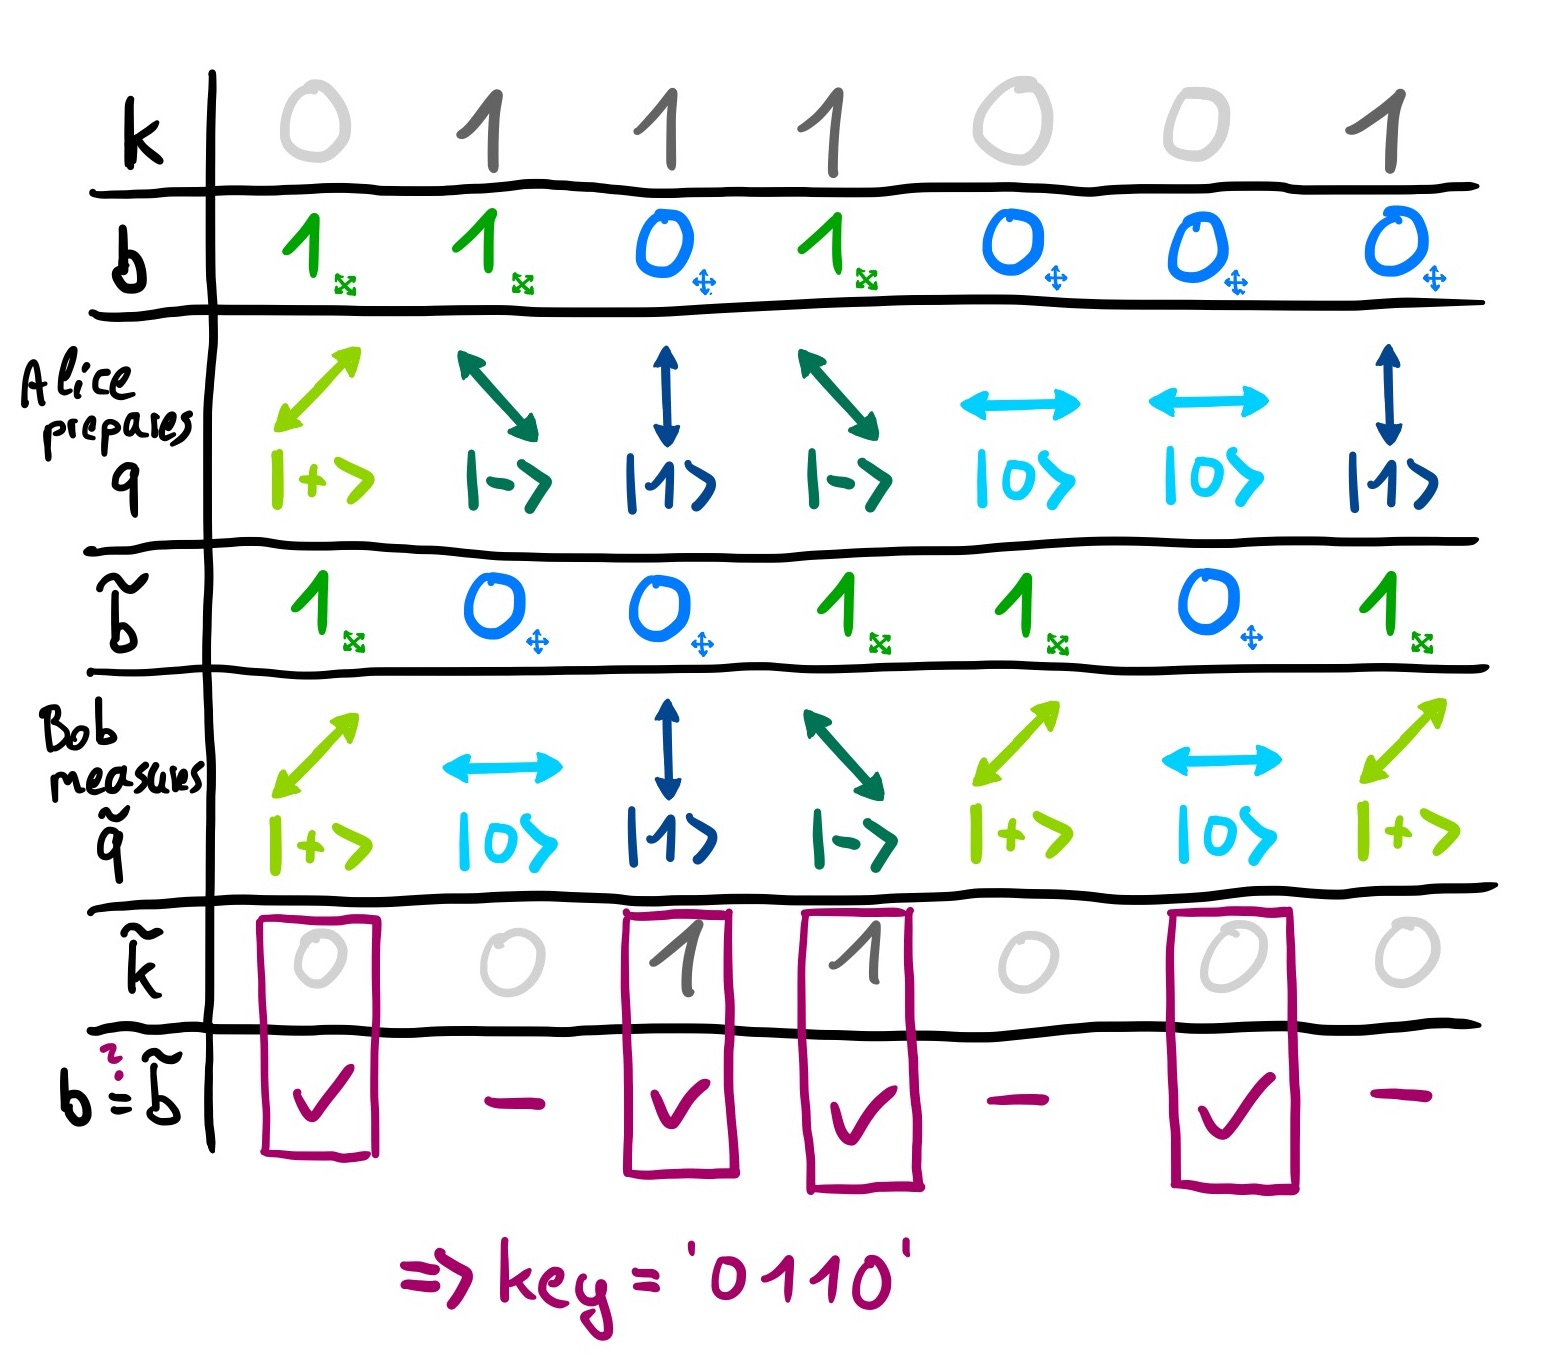

In [ ]:
def encoding(alice_bitstring,alice_bases):
    qubits_encoded = []
    for i in range(len(alice_bitstring)):
        # Creating a new Quantum Circuit called circ.
        circ = QuantumCircuit(1,1)
        if alice_bases[i] == "0":        # 0 means to encode in z basis i.e. (|0>,|1>)
            if alice_bitstring[i] == "0":             # we don't need to change the state as initial state is |0> and 
                pass                      # with 0 encoded in z basis gives |0> qubit state.
            elif alice_bitstring[i] == "1":      # with 1 encoded in z basis gives |1> qubit state.
                circ.x(0)               # Apply X gate to get |1> state.
        elif alice_bases[i] == "1":     # 1 means to encode in x basis i.e (|+>,|->)
            if alice_bitstring[i] == "0":
                # Apply H gate to get |+> qubit state
                # Insert your code here
            
            
            elif alice_bitstring[i] == '1':
                # Apply X and H gate to get |-> qubit state
                # Insert your code here
                
                
        qubits_encoded.append(circ)       # now we add the quantum circuit to the list of encoded qubits for each loop
    return qubits_encoded

We will use this function to create the encoded qubits for Alice

In [ ]:
qubits_encoded = encoding(alice_bitstring, alice_bases)

## 2.4 Step 4: Sending

Next, Alice sends the qubits_encoded to Bob via the **Quantum_Channel** function.

In [ ]:
Quantum_Channel = qubits_encoded

## 2.5 Step 5: Measurement

Now that Bob has received the qubits via **Quantum_Channel**, he measures the qubits on the measurement basis from step 2.

In [ ]:
def measurement(bob_bases,Quantum_Channel,backend):
    # bob_bases: we have got these in step 2
    # qubits_encoded: we also have got these in step 3
    # backend: we can use either qasm_simulator or an IBM Quantum backend (real device) to measure the qubits
    
    # Stores the results of Bob's measurements
    bob_bitstring = ''     
    
    for i in range(len(Quantum_Channel)):
        circ = Quantum_Channel[i]         # assigning 'circ' with each circuit received from Quantum_Channel
        if bob_bases[i] == "0":           # 0 means to measure in z basis 
            circ.measure(0,0)            
        elif bob_bases[i] == "1":         # 1 means to measure in x basis
            # Applying H gate to measure in x basis
            # Insert your code here
            
            
        
        # Now that we have added measurements, we can run each circuit on desired backend
        job = execute(circ,backend=backend,shots=1024)
        counts = job.result().get_counts()
        string = max(counts, key = counts.get)
        bob_bitstring += string
    return bob_bitstring
            

Measure the qubits that Bob received on the **qasm_simulator** backend. You can change the backend to any other IBM Quantum hardware and test, but for this tutorial we will be only using the simulator.

In [ ]:
backend = Aer.get_backend('qasm_simulator')

bob_bitstring = measurement(bob_bases, Quantum_Channel, backend)

## 2.6 Step 6: Send Bases to Bob

Alice shares the bases that were used to encode each bit via a classical channel.

In [ ]:
Classical_Channel = alice_bases

## 2.7 Step 7: Find Symmetric Key

Alice and Bob can now discard the bits in their key that used a different encoding and decoding basis.

In [ ]:
def check_bases(alice_bases,bob_bases):
    agreed_bases_position = []
    
    for i in range(len(alice_bases)):
        if alice_bases[i] == bob_bases[i]:
            agreed_bases_position.append(i)
    return agreed_bases_position

# Now that Bob knows which bases Alice used to encode the qubits, 
# he can see where they happen to have agreed on chosen bases and 
# send Alice a list of all the positions where they chose the same basis.
agreed_bases_position = check_bases(Classical_Channel,bob_bases)

# Send the list of agreeing_bases from Bob to Alice over the Classical channel
Classical_Channel = agreed_bases_position

Finally after Alice and Bob discard every bit that was encoded using a basis that they didn't agree on, they will have a shared key at the end.

In [ ]:
def key_formation(bitstring, position):
    key = ''
    for i in position:
        key += bitstring[i]
    return key

In [ ]:
alice_key = key_formation(alice_bitstring, Classical_Channel)
bob_key = key_formation(bob_bitstring, agreed_bases_position)

# First 20 elements:
print("alice_key: ", alice_key[:20])
print("bob_key: ", bob_key[:20])
print("Check if Alice's key is equal to Bob's key: ", alice_key == bob_key)

# 3. Testing the protocol with a message

Now that Alice and Bob have a shared key, they can now use this key to encrypt their message.

Let's look at an example where Alice sends a string of bits as message to Bob. First, we will need to create two functions that can encrypt the message bits at Alice's side and decrypt the message bits at Bob's side.

In [ ]:
def encrypt(msg, key):
    encrypted_msg = ''
    for i in range(len(msg)):
        encrypted_msg += str(int(msg[i]) ^ int(key[i]))    # Applying Bitwise XOR operation on the message using the key
    return encrypted_msg

def decrypt(encrypted_msg, key):
    decrypted_msg = ''
    for i in range(len(encrypted_msg)):
        decrypted_msg += str(int(encrypted_msg[i]) ^ int(key[i])) # Again Applying Bitwise XOR to decrypt the message using key
    return decrypted_msg

><b>Note</b>: Here the length of message should be less than the key length.

In [ ]:
Alice_message = '010001011111000101'    # message bits

# Encrypt Alice's message 
encrypted_msg = encrypt(Alice_message, alice_key)

# Decrypt Alice's message
decrypted_msg = decrypt(encrypted_msg, bob_key)      

print("Original Message sent by Alice: ", Alice_message)
print("Encrypted Message: ", encrypted_msg)
print("Decrypted Message received by Bob: ", decrypted_msg)

><b> From the above output, we see that we were able to successfully form a secure communication between Alice and Bob using the BB84 QKD protocol.</b>

# Homework Problem

Now that you have understood the protocol and seen the code for each step, try to write a function to mimic an eavesdropper "Eve", who attempts to intercept the message that Alice is sending.

><b>Hint</b>: We know that Eve is about to intercept (measure the qubits on randomly selected bases) the transmitted message. In this case, Bob will receive his message bits and will implement his steps as usual. After implementing an interception function on Bob's measurement, check if you still get Alice's key equal to Bob's key. If the keys are not equal, that means that Eve has intercepted the message.

# References and Further Reading:

>1. Abraham Asfaw and Antonio Corcoles and Luciano Bello and Yael Ben-Haim and Mehdi Bozzo-Rey and Sergey Bravyi and Nicholas Bronn and Lauren Capelluto and Almudena Carrera Vazquez and Jack Ceroni and Richard Chen and Albert Frisch and Jay Gambetta and Shelly Garion and Leron Gil and Salvador De La Puente Gonzalez and Francis Harkins and Takashi Imamichi and Hwajung Kang and Amir h. Karamlou and Robert Loredo and David McKay and Antonio Mezzacapo and Zlatko Minev and Ramis Movassagh and Giacomo Nannicini and Paul Nation and Anna Phan and Marco Pistoia and Arthur Rattew and Joachim Schaefer and Javad Shabani and John Smolin and John Stenger and Kristan Temme and Madeleine Tod and Stephen Wood and James Wootton, **"Learn Quantum Computation Using Qiskit"** (2020) https://qiskit.org/textbook/ch-algorithms/quantum-key-distribution.html
>2. IBM Quantum team, **"IBM Quantum Challenge"** (2020). https://github.com/qiskit-community/may4_challenge_exercises/blob/master/ex03/Challenge3_BB84.ipynb
>3. Zhang, Qiang, et al. **"Large scale quantum key distribution: challenges and solutions."** Optics express 26.18 (2018): 24260-24273. https://doi.org/10.1364/OE.26.024260